#<center> Order-book Simulation Demonstration</center>

**Author:** Danish Shah (sdanish1998@gmail.com)

**Date:** 10/8/2023

This notebook contains a demonstration of using the order-book and market simulation and the generated results. To try it, upload the code files before importing them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from configuration import Config
from lob import Order, OrderBookSnapshot, OrderBookHistory
from market import Market

In [3]:
def run_orderbook_simulation(config: Config):
    """Runs and saves the result of order-book simulation according to the config"""
    orderbook = OrderBookHistory.from_config(config)
    mkt = Market.from_config(config)
    # Run simulation
    while orderbook.end_time < config.end_time:
        snapshot = orderbook.get_latest_snapshot()
        new_order = mkt.get_next_order(snapshot)
        new_snapshot = snapshot.update(new_order)
        orderbook.add_snapshot(new_snapshot)
    return orderbook

In [4]:
config = Config('config.yaml')
ob = run_orderbook_simulation(config)

In [5]:
df = ob.get_nbbo_history()
print(len(df))
df.tail()

1678


,Timestamp,BidPrice,BidVolume,AskPrice,AskVolume
1673,9958,100.82,1,100.83,7
1674,9966,100.82,1,100.83,7
1675,9969,100.82,1,100.83,7
1676,9997,100.79,1,100.80,7
1677,10000,100.82,1,100.83,0


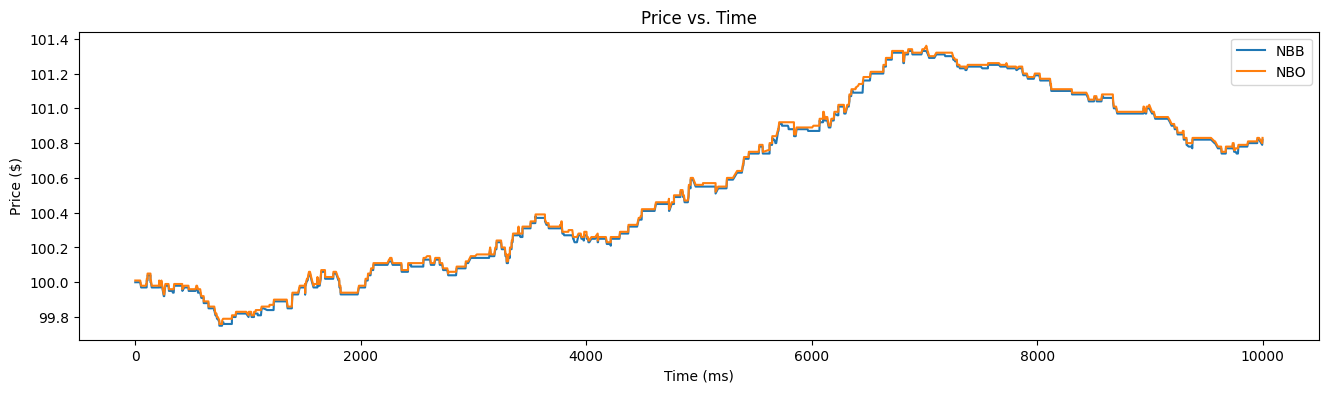

In [18]:
fig = plt.figure(figsize=(16,4))
plt.plot(df['Timestamp'], df['BidPrice'])
plt.plot(df['Timestamp'], df['AskPrice'])
plt.legend(['NBB', 'NBO'])
plt.xlabel('Time (ms)')
plt.ylabel('Price ($)')
_ = plt.title('Price vs. Time')

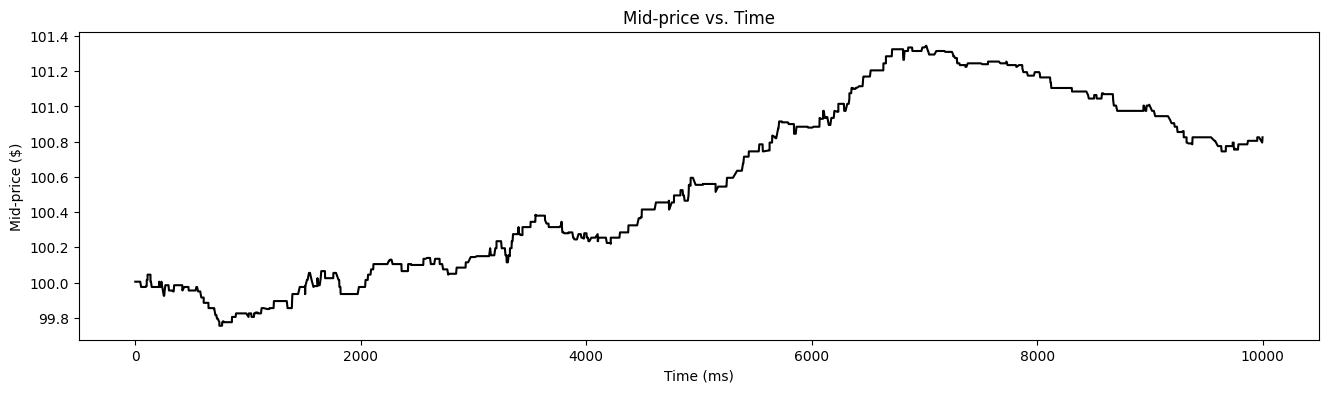

In [19]:
fig = plt.figure(figsize=(16,4))
plt.plot(df['Timestamp'], 0.5*(df['AskPrice'] + df['BidPrice']), 'k')
plt.xlabel('Time (ms)')
plt.ylabel('Mid-price ($)')
_ = plt.title('Mid-price vs. Time')

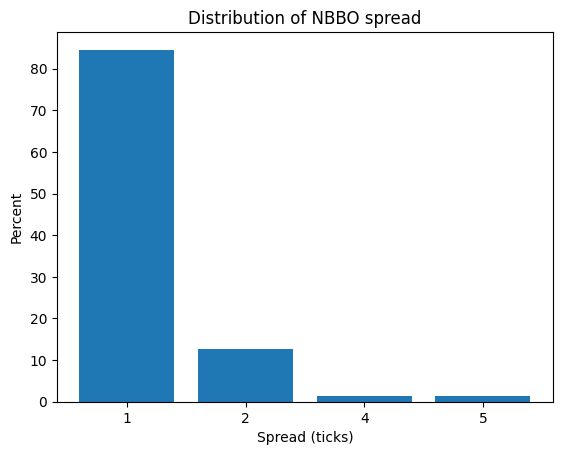

In [46]:
spread = df['AskPrice'] - df['BidPrice']
heights, bins = np.histogram(spread, bins=4)

percent = [i/sum(heights)*100 for i in heights]
bins = [str(1 + int(bin/0.01)) for bin in bins]

plt.bar(x=bins[:-1], height=percent)
plt.xlabel('Spread (ticks)')
plt.ylabel('Percent')
_ = plt.title('Distribution of NBBO spread')

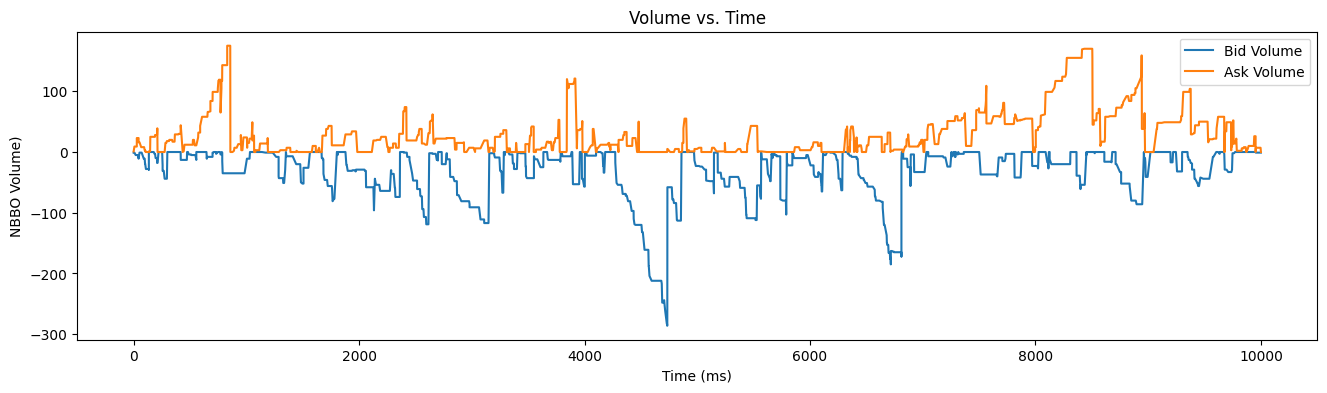

In [47]:
fig = plt.figure(figsize=(16,4))
_ = plt.plot(df['Timestamp'], -df['BidVolume'])
_ = plt.plot(df['Timestamp'], df['AskVolume'])
plt.legend(['Bid Volume', 'Ask Volume'])
plt.xlabel('Time (ms)')
plt.ylabel('NBBO Volume)')
_ = plt.title('Volume vs. Time')

In [9]:
trades = []
for snapshot in ob.snapshots:
    trades.extend(snapshot.trades)
print(len(trades))

trade_type = [trade.order_type.name for trade in trades]
print(np.unique(trade_type))

593609
['MARKET_ORDER']


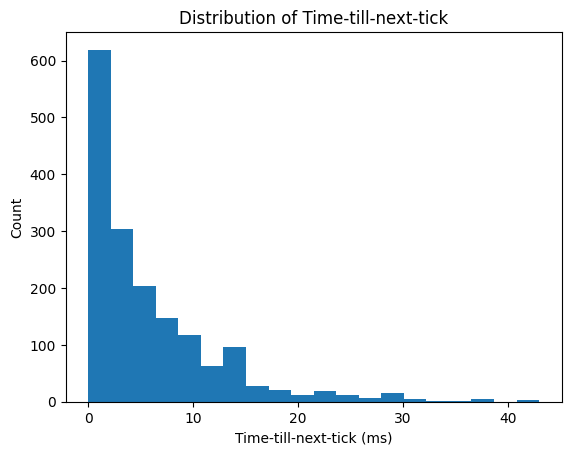

In [48]:
time_diff = np.diff(df['Timestamp'])
plt.hist(time_diff, bins=20)
plt.xlabel('Time-till-next-tick (ms)')
plt.ylabel('Count')
_ = plt.title('Distribution of Time-till-next-tick')

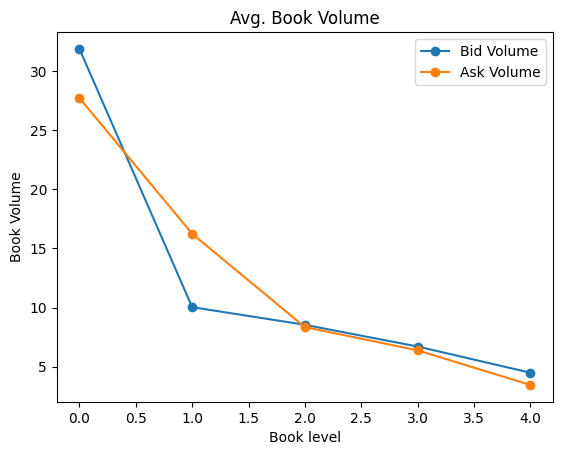

In [50]:
bid_vol, ask_vol = [], []
for snapshot in ob.snapshots:
    bid_vol.append(snapshot.bid_vol)
    ask_vol.append(snapshot.ask_vol)

bid_vol, ask_vol = np.mean(bid_vol, axis=0), np.mean(ask_vol, axis=0)
plt.plot(bid_vol, '-o')
plt.plot(ask_vol, '-o')
plt.legend(['Bid Volume', 'Ask Volume'])
plt.xlabel('Book level')
plt.ylabel('Book Volume')
_ = plt.title('Avg. Book Volume')